#Ангилал Classification 

Supervised Learning - Удирдуулсан сургалт
*   Хэв шинжийг олохдоо өгөгдлийг оролтын болон гаралтын
хоёуланг нь ашигладаг аргыг хэлдэг.
*   Удирдуулсан сургалтын аргууд

  • Classification (Ангилал)

  • Regression (Регресс) техникийн аль нэгт хамаарна.



linear regression vs logistic regression

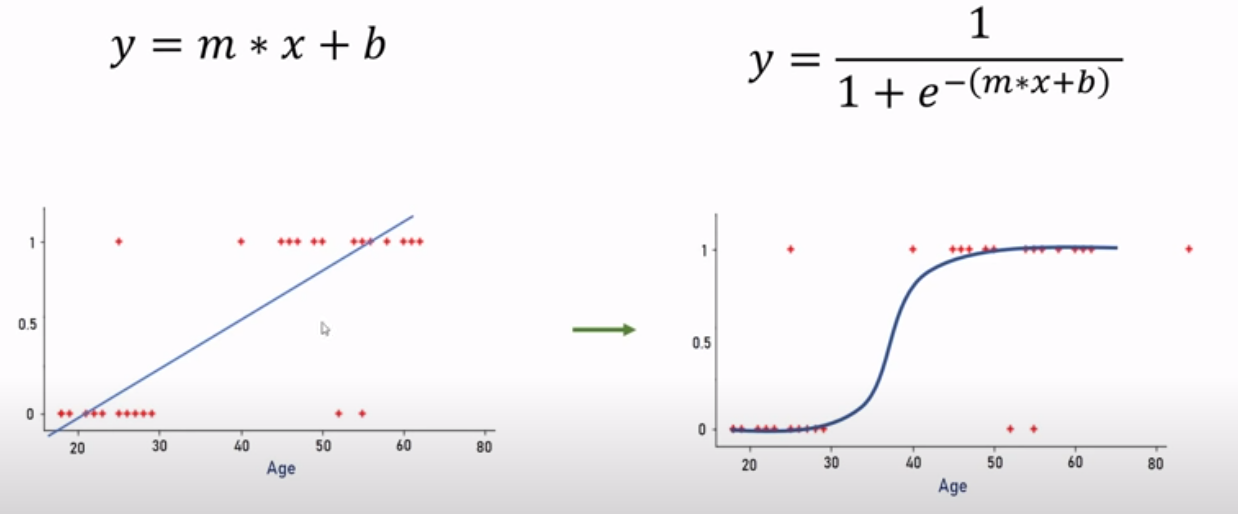

##Логистик регресс (Logistic regression)


*   Үр дүнг тодорхойлохдоо нэг буюу хэд хэдэн бие даасан
хувьсагчийг ашигладаг машин сургалтын маш энгийн атлаа
чухал ангиллын алгоритм юм.

*   Логистик регресс нь хамааралтай хувьсагч ба үл хамаарах
хувьсагч хоорондын хамгийн сайн тохирох хамаарлыг олохыг
оролддог. 


Давуу тал:
*   Энэ бол маш энгийн бөгөөд үр дүнтэй алгоритм юм.
*   Бага зөрүү

Сул тал:
*   Олон тооны категорчилсон feature боловсруулахад муу.
*   Энэ нь өгөгдөл нь дутуу утгагүй
*   Таамаглагч (predictor) бие биенээ хамааралгүй гэж үздэг.







    

In [ ]:
import scipy as sc
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

###Жишээ 1

age: нас

insurance: тухайн хүн даатгал худалдаж авсан эсэхийг заана. 0 нь Үгүй, 1 нь Тийм гэдгийг илэрхийлнэ

шийдэл : Логистик регрессийн тусламжтайгаар хүн наснаасаа хамааран даатгал худалдаж авах эсэхийг таамаглах

In [ ]:
df = pd.read_csv("insurance.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


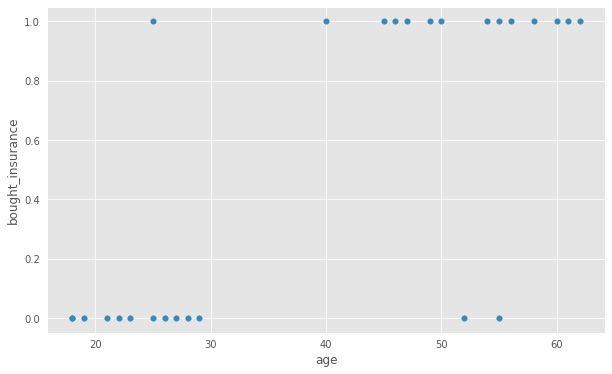

In [ ]:
df.plot.scatter(x='age',y='bought_insurance',s=30);

train  болон test 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [ ]:
X_test

,age
5,56
22,40
24,50
0,22
23,45
17,58


логистик регресс хийнэ

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
X_test

,age
5,56
22,40
24,50
0,22
23,45
17,58


In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
model.predict_proba(X_test)

array([[0.16313205, 0.83686795],
       [0.5665691 , 0.4334309 ],
       [0.2846541 , 0.7153459 ],
       [0.91748917, 0.08251083],
       [0.41901642, 0.58098358],
       [0.13319752, 0.86680248]])

In [ ]:
model.score(X_test,y_test)

0.8333333333333334

In [ ]:
y_predicted

array([1, 0, 1, 0, 1, 1])

In [ ]:
X_test

,age
5,56
22,40
24,50
0,22
23,45
17,58


In [ ]:
model.coef_

array([[0.11893581]])

In [ ]:
model.intercept_

array([-5.02529911])

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 болон -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [ ]:
age = 35
prediction_function(age)

0.4850044983805899

In [ ]:
# 0.485 нь 0.5-аас бага байгаа нь 35 нас хүрсэн хүн даатгал худалдаж авахгүй гэсэн үг
# 0.485 нь 0.5-аас их байгаа нь 43-тай хүн даатгал худалдаж авна гэсэн үг
age = 35
prediction_function(age)

0.4850044983805899

###Жишээ 2

Ad click purchase prediction - Logistic Regression

  Бид тухайн хэрэглэгчийн онцлогт тулгуурлан зар дээр дарах эсэхийг урьдчилан таамаглах.

  UserId: id
  
  Age: nas
  
  Estimated Salary: Хэрэглэгчийн орлого 
  
  Gender: hvis 
  
  Purchased: 0 эсвэл 1 нь зар дээр дарж байгааг харуулж байна

In [ ]:
data = pd.read_csv("Social_Network_Ads.csv")

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


####Data шинжлэх

Text(0.5, 0, 'Age')

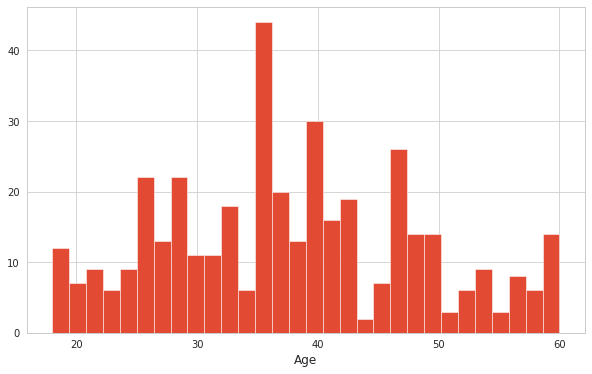

In [ ]:
# histogram ашиглаж насыг харах
sns.set_style('whitegrid')
data['Age'].hist(bins=30)
plt.xlabel('Age')


Дийлэнх нь 35-48 насны ангилалд багтаж байна

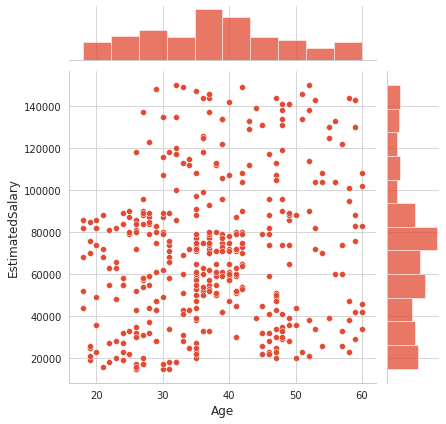

In [ ]:
# цалинг насыг харуулсан хамтарсан график
sns.jointplot(x='Age',y='EstimatedSalary',data= data)


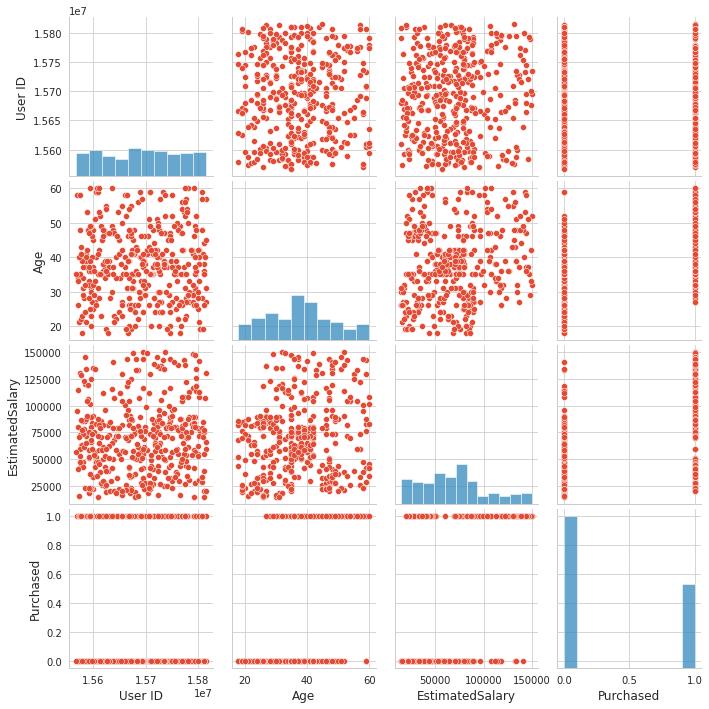

In [ ]:
sns.pairplot(data)

K- Nearest Neighbor Algorithm
*   Энэ нь шинэ өгөгдлийн цэгүүдийг K хөршийн дийлэнх өгөгдлийн цэгүүдийн ангилалаас хамааран ангилдаг бөгөөд K нь авч үзэх хөршүүдийн тоо юм.

*  KNN ижил төстэй байдлыг (заримдаа зай гэж нэрлэдэг)
Евклидийн, Манхэттэн (Manhattan) гэх мэт үндсэн
математикийн томьёогоор тооцоолдог. 







####Feature Engineering

Категорийн хувьсагчдыг тоон хэлбэрт хөрвүүлэх

In [ ]:
Sex  = pd.get_dummies(data['Gender'] , drop_first = True)
Sex

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [ ]:
data['Sex'] = Sex
data = data.drop('Gender' , axis =1)

Өгөгдлийг стандартчилах

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
ss.fit(data.drop('Purchased', axis =1 ))

StandardScaler()

In [ ]:
scaled_featured = ss.transform( data.drop('Purchased', axis =1 ))

In [ ]:
scaled_featured

array([[-0.93657932, -1.78179743, -1.49004624,  1.02020406],
       [ 1.66838653, -0.25358736, -1.46068138,  1.02020406],
       [-0.32087714, -1.11320552, -0.78528968, -0.98019606],
       ...,
       [-0.52039175,  1.17910958, -1.46068138, -0.98019606],
       [ 0.88695546, -0.15807423, -1.07893824,  1.02020406],
       [-1.36231017,  1.08359645, -0.99084367, -0.98019606]])

In [ ]:
scale = pd.DataFrame( scaled_featured , columns = data.columns[:-1])

In [ ]:
scale['Sex'] = scale['Purchased']

In [ ]:
scale = scale.drop('Purchased'  ,axis =1)

In [ ]:
scale

,User ID,Age,EstimatedSalary,Sex
0,-0.936579,-1.781797,-1.490046,1.020204
1,1.668387,-0.253587,-1.460681,1.020204
2,-0.320877,-1.113206,-0.785290,-0.980196
3,-1.233692,-1.017692,-0.374182,-0.980196
4,1.571389,-1.781797,0.183751,1.020204
...,...,...,...,...
395,0.004517,0.797057,-0.844019,-0.980196
396,0.203039,1.274623,-1.372587,1.020204
397,-0.520392,1.179110,-1.460681,-0.980196
398,0.886955,-0.158074,-1.078938,1.020204


####Logistic Regression

In [ ]:
data.head(1)

,User ID,Age,EstimatedSalary,Purchased,Sex
0,15624510,19,19000,0,1


In [ ]:
x = scale
y = data['Purchased']

In [ ]:
X_train  ,X_test , y_train , y_test = train_test_split( x , y , test_size = 0.3 , random_state = 50)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_model  = LogisticRegression()

In [ ]:
logistic_model.fit(X_train,y_train)

LogisticRegression()

####Таамаглах

In [ ]:
# Туршилтын өгөгдлийн утгыг урьдчилан таамаглах.

In [ ]:
pred = logistic_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
print( confusion_matrix (y_test , pred))

[[77  3]
 [13 27]]


In [ ]:
print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        80
           1       0.90      0.68      0.77        40

    accuracy                           0.87       120
   macro avg       0.88      0.82      0.84       120
weighted avg       0.87      0.87      0.86       120



In [ ]:
# 88% accuracy works !

##к хамгийн ойрын хөрш - k Nearest Neighbors (k-NN)

  Энэ нь шинэ өгөгдлийн цэгүүдийг K хөршийн дийлэнх
өгөгдлийн цэгүүдийн ангиллаас хамааран ангилдаг
бөгөөд K нь авч үзэх хөршүүдийн тоо юм. 

KNN ижил төстэй байдлыг (заримдаа зай гэж нэрлэдэг)
Евклидийн, Манхэттэн (Manhattan) гэх мэт үндсэн
математикийн томьёогоор тооцоолдог.

K-ийн зөв утгыг сонгох:


*   Сургалтын өгөгдөлд тохирох K-г сонгохын тулд KNN алгоритмыг өөр өөр
   K утгуудаар хэд хэдэн удаа ажиллуулж, үл үзэгдэх өгөгдлийн алдааны тоог багасгах

Давуу тал:

*   KNN нь энгийн бөгөөд хэрэгжүүлэхэд хялбар
*   Загвар бүтээх, хэд хэдэн параметрүүдийг тохируулах, зарим ангиллын
алгоритмуудын адил нэмэлт таамаглал гаргах шаардлагагүй.
*   Үүнийг ангилал, регресс, хайлт хийхэд ашиглаж болно (уян хатан)

Сул тал:
*   түүвэр/таамаглагч/үл хамаарах хувьсагчийн тоо нэмэгдэх тусам
алгоритм мэдэгдэхүйц удааширна.

Анхаарах зүйлс:
  
Бид санал өгөх хөршүүдийн тоо болох k-г сонгох ёстой.


*   "Хамгийн ойр" гэдэг нь хамгийн ойр зайд гэсэн утгатай
Санал өгөх янз бүрийн арга байдаг.

*   Тухайлбал, би хамгийн ойрын хөршүүдийн дотроос хамгийн ойрынх нь хөршүүдээс илүү үнэ цэнэтэй байж магадгүй.
*   Ангид хэрхэн хуваарилах шийдлээ гаргах

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.datasets import make_moons, load_iris
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

###K-Nearest Neighbor Classifier to predict fruits

In [ ]:
fruits = pd.read_csv('fruit_data_with_colors.csv')

In [ ]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
# жимсний төрлүүд
predct = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
predct

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [ ]:
# хэдэн жимс байгааг төрлөөр нь харах
fruits['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [ ]:
# Ангилах
apple_data = fruits[fruits['fruit_name'] == 'apple']
orange_data = fruits[fruits['fruit_name'] == 'orange']
lemon_data = fruits[fruits['fruit_name'] == 'lemon']
mandarin_data = fruits[fruits['fruit_name'] == 'mandarin']

In [ ]:
apple_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


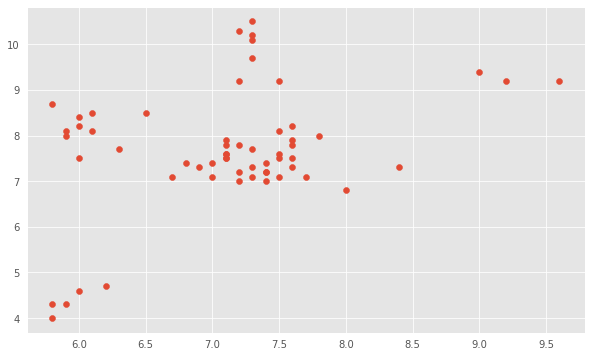

In [ ]:
plt.scatter(fruits['width'],fruits['height'])

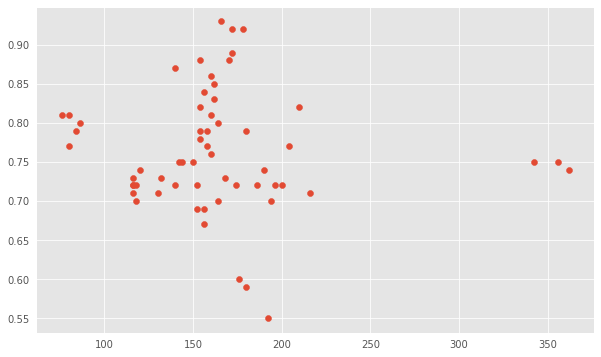

In [ ]:
plt.scatter(fruits['mass'],fruits['color_score'])

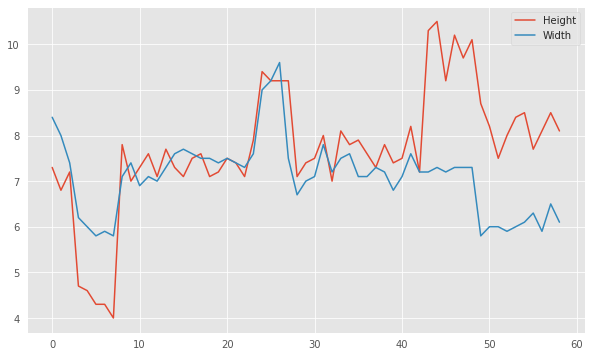

In [ ]:
plt.plot(fruits['height'],label='Height')
plt.plot(fruits['width'],label='Width')
plt.legend()

K-Nearest Neighbors  train test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X=fruits[['mass','width','height']]
Y=fruits['fruit_label']
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0)

In [ ]:
X_train.describe()

,mass,width,height
count,44.000000,44.000000,44.000000
mean,159.090909,7.038636,7.643182
std,53.316876,0.835886,1.370350
min,76.000000,5.800000,4.000000
25%,127.500000,6.175000,7.200000
50%,157.000000,7.200000,7.600000
75%,172.500000,7.500000,8.250000
max,356.000000,9.200000,10.500000


In [ ]:
X_test.describe()

,mass,width,height
count,15.000000,15.00000,15.000000
mean,174.933333,7.30000,7.840000
std,60.075508,0.75119,1.369463
min,84.000000,6.00000,4.600000
25%,146.000000,7.10000,7.250000
50%,166.000000,7.20000,7.600000
75%,185.000000,7.45000,8.150000
max,362.000000,9.60000,10.300000


KNN classifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test,y_test)

0.5333333333333333

Таамаглах

In [ ]:
prediction1 = knn.predict([['100','6.3','8']])
predct[prediction1[0]]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


'lemon'

In [ ]:
prediction2=knn.predict([['300','7','10']])
predct[prediction2[0]]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


'orange'